## Relevancy of Foursquare Results for Local Context

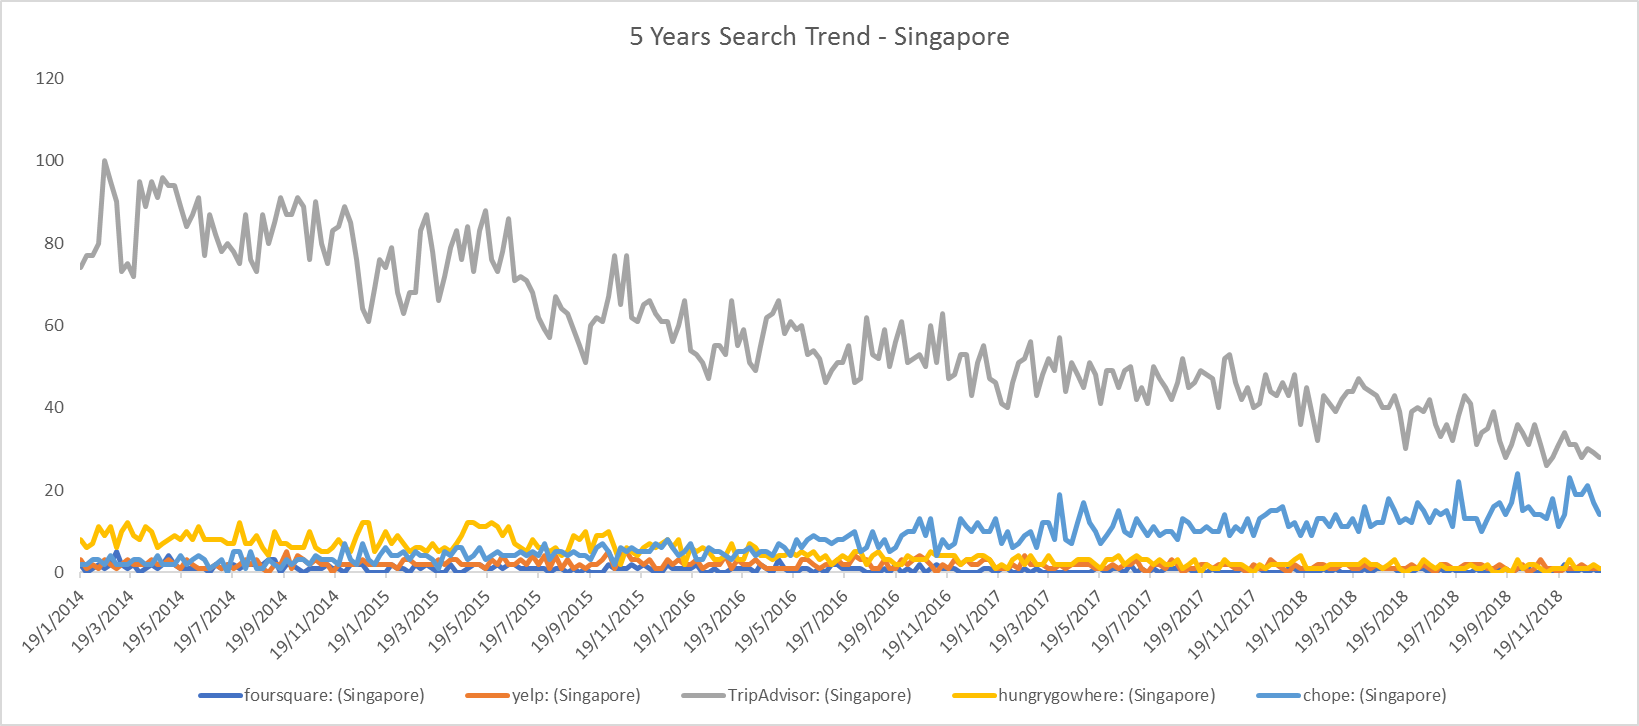

In [1]:
# shows the Google trend of search results for the selected location intelligence providers over 5 years
from IPython.display import Image
Image(filename=r"5 Years Search Trend-Singapore.png", width=800, height=600)

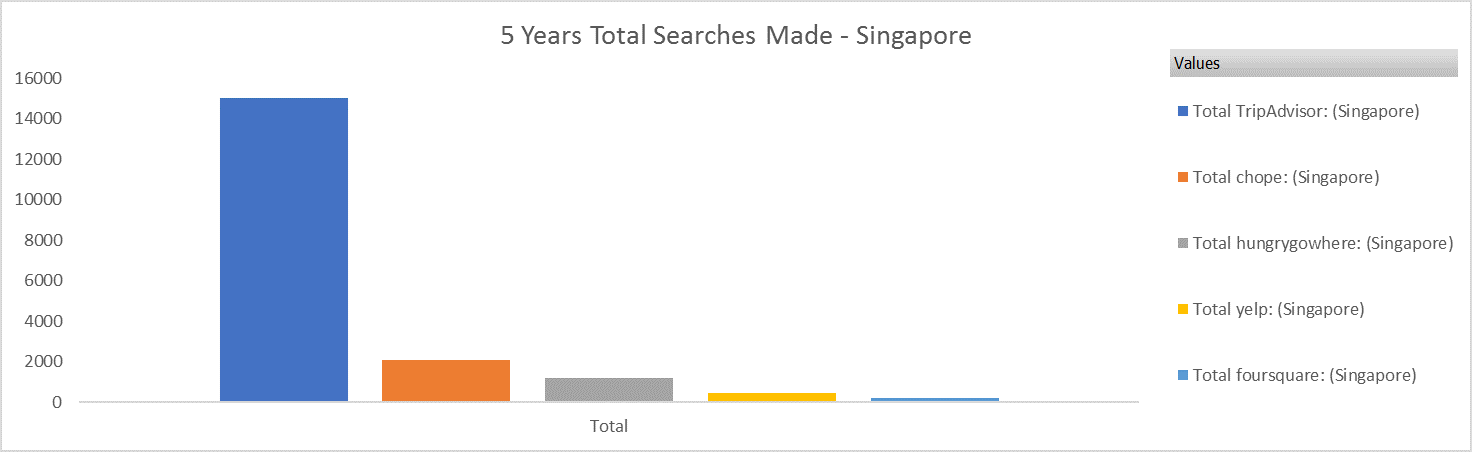

In [2]:
# Shows the total search results over a 5 years period
Image(filename=r"5 Years Total Searches Made-Singapore.png", width=800, height=600)

### From the above, it shows that Foursquare has the lowest number of searches locally. Does this have an impact on the results Foursquare returned when we used its services?

<font color='blue'>
### To answer this, we will attempt to:
### (1) Are more results returned if the neighbourhood is a known tourist spot?
### (2) Do the results returned reflect the nature or characteristics of the neighbourhood?
<font>

<font color='green'>
### Target audience: those who are interested to find out whether Foursquare results are relevant in local context given its low searched results.
<font>

In [3]:
# import required modules
import requests
import bs4 
import lxml.html as lh
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json

In [4]:
# read excel file and print out contents
all_data = pd.read_excel(r'Exploring Neighbourhood.xls')
print(all_data)

  Neighbourhood    Country   Latitude   Longitude  Remarks
0    Marina Bay  Singapore   1.284000  103.853500  Tourist
1       Sentosa  Singapore   1.249400  103.823800  Tourist
2   Jurong East  Singapore   1.332900  103.743600    Local
3        Yishun  Singapore   1.430400  103.835400    Local
4       Orchard  Singapore   1.303000  103.825800  Tourist
5           M7A     Canada  43.662300  -79.389500      NaN
6           M6C     Canada  43.693781  -79.428191      NaN
7           M5A     Canada  43.654260  -79.360636      NaN
8           M5X     Canada  43.648429  -79.382280      NaN
9           M1S     Canada  43.794200  -79.262029      NaN


In [5]:
# converting to a panda dataframe
all_data = pd.DataFrame(all_data)
print(all_data)

  Neighbourhood    Country   Latitude   Longitude  Remarks
0    Marina Bay  Singapore   1.284000  103.853500  Tourist
1       Sentosa  Singapore   1.249400  103.823800  Tourist
2   Jurong East  Singapore   1.332900  103.743600    Local
3        Yishun  Singapore   1.430400  103.835400    Local
4       Orchard  Singapore   1.303000  103.825800  Tourist
5           M7A     Canada  43.662300  -79.389500      NaN
6           M6C     Canada  43.693781  -79.428191      NaN
7           M5A     Canada  43.654260  -79.360636      NaN
8           M5X     Canada  43.648429  -79.382280      NaN
9           M1S     Canada  43.794200  -79.262029      NaN


In [6]:
# making a copy of the dataframe
sing_data = all_data.copy()
print(sing_data)

  Neighbourhood    Country   Latitude   Longitude  Remarks
0    Marina Bay  Singapore   1.284000  103.853500  Tourist
1       Sentosa  Singapore   1.249400  103.823800  Tourist
2   Jurong East  Singapore   1.332900  103.743600    Local
3        Yishun  Singapore   1.430400  103.835400    Local
4       Orchard  Singapore   1.303000  103.825800  Tourist
5           M7A     Canada  43.662300  -79.389500      NaN
6           M6C     Canada  43.693781  -79.428191      NaN
7           M5A     Canada  43.654260  -79.360636      NaN
8           M5X     Canada  43.648429  -79.382280      NaN
9           M1S     Canada  43.794200  -79.262029      NaN


In [7]:
# drop the column of "Remarks"
sing_data.drop(['Remarks'], axis=1, inplace=True)
print(sing_data)

  Neighbourhood    Country   Latitude   Longitude
0    Marina Bay  Singapore   1.284000  103.853500
1       Sentosa  Singapore   1.249400  103.823800
2   Jurong East  Singapore   1.332900  103.743600
3        Yishun  Singapore   1.430400  103.835400
4       Orchard  Singapore   1.303000  103.825800
5           M7A     Canada  43.662300  -79.389500
6           M6C     Canada  43.693781  -79.428191
7           M5A     Canada  43.654260  -79.360636
8           M5X     Canada  43.648429  -79.382280
9           M1S     Canada  43.794200  -79.262029


In [10]:
# drop data that is not required for current exploration
sing_data.drop(sing_data.index[5:10], inplace=True)
sing_data

,Neighbourhood,Country,Latitude,Longitude
0,Marina Bay,Singapore,1.2840,103.8535
1,Sentosa,Singapore,1.2494,103.8238
2,Jurong East,Singapore,1.3329,103.7436
3,Yishun,Singapore,1.4304,103.8354
4,Orchard,Singapore,1.3030,103.8258


In [11]:
# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 

In [12]:
# map rendering library
import folium 

In [13]:
address = 'Singapore, Singapore'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Singapore, Singapore are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Singapore, Singapore are 1.3408528, 103.878446863736.


In [14]:
# create map of Singapore using latitude and longitude values
map_singapore = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(sing_data['Latitude'], sing_data['Longitude'], sing_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_singapore)  
    
map_singapore

In [16]:
neighbourhood_latitude = sing_data.loc[1, 'Latitude'] # neighbourhood latitude value
neighbourhood_longitude = sing_data.loc[1, 'Longitude'] # neighbourhood longitude value

neighbourhood_name = sing_data.loc[1, 'Neighbourhood'] # neighbourhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighbourhood_name, 
                                                               neighbourhood_latitude, 
                                                               neighbourhood_longitude))

Latitude and longitude values of Sentosa are 1.2494, 103.8238.


In [18]:
# Getting the results of the query for the venues in Sentosa within a radius of 2000m
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c4038211ed2193ebd780dd5'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4b475118f964a520c02e26e3-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/resort_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d12f951735',
         'name': 'Resort',
         'pluralName': 'Resorts',
         'primary': True,
         'shortName': 'Resort'}],
       'id': '4b475118f964a520c02e26e3',
       'location': {'address': '1 The Knolls',
        'cc': 'SG',
        'city': 'Singapore',
        'country': 'Singapore',
        'crossStreet': 'Sentosa Island',
        'distance': 66,
        'formattedAddress': ['1 The Knolls (Sentosa Island)',
         '098297',
         'Singapore'],
        'labeledLatLngs': [{'label': 'display',

In [19]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [20]:
# Cleaning the JSON file and structuring it into a Pandas DataFrame

# Import json_normalize module from pandas.io.json
from pandas.io.json import json_normalize

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Capella Singapore,Resort,1.249690,103.824323
1,Palawan Beach,Beach,1.248738,103.822002
2,The Knolls,Restaurant,1.249281,103.824356
3,So SPA by Sofitel,Spa,1.248546,103.826667
4,Auriga Spa,Spa,1.249532,103.824008


In [21]:
# print out number of venues returned by Foursquare
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


## Exploring Neighbourhoods in List

In [22]:
# creating a function to extract relevant informaiton from Foursquare
def getNearbyVenues(names, latitudes, longitudes, radius=800, limit=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
# Generating venues for 5 selected neighbourhoods of Singapore
singapore_venues = getNearbyVenues(names=sing_data['Neighbourhood'],
                                   latitudes=sing_data['Latitude'],
                                   longitudes=sing_data['Longitude'])

Marina Bay
Sentosa
Jurong East
Yishun
Orchard


In [24]:
# Checking the size of the DataFrame as well as the first 5 lines of data
print(singapore_venues.shape)
singapore_venues.head()

(417, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marina Bay,1.284,103.8535,The Fullerton Bay Hotel,1.283878,103.853314,Hotel
1,Marina Bay,1.284,103.8535,One Fullerton,1.285797,103.854181,Plaza
2,Marina Bay,1.284,103.8535,The Fullerton Hotel,1.286279,103.852837,Hotel
3,Marina Bay,1.284,103.8535,CITY Hot Pot Shabu shabu,1.284173,103.851585,Hotpot Restaurant
4,Marina Bay,1.284,103.8535,Fullerton WaterFront,1.284822,103.853433,Waterfront


In [25]:
# Checking number of venues returned by each neighbourhood
singapore_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Jurong East,80,80,80,80,80,80
Marina Bay,100,100,100,100,100,100
Orchard,84,84,84,84,84,84
Sentosa,96,96,96,96,96,96
Yishun,57,57,57,57,57,57


### From the above data, basic hypothesis that neighbourhood frequented more by locals will have a lower number of venues reflected as shown by Yishun which has only 57 venues shown seems probable. Somehow not within my expectation is that Jurong East has 80 venues reflected (which is almost the same as that of Orchard, the shopping belt) as it is more frequented by locals rather than tourists.  However, it could also be due to Jurong East being an interchange hub as well as it has business park as well as a hotel nearby.  

In [26]:
# Checking the uique categories returned
print('There are {} uniques categories.'.format(len(singapore_venues['Venue Category'].unique())))

There are 135 uniques categories.


## Analyzing each neighbourhood

In [27]:
# one hot encoding
singapore_onehot = pd.get_dummies(singapore_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
singapore_onehot['Neighbourhood'] = singapore_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [singapore_onehot.columns[-1]] + list(singapore_onehot.columns[:-1])
singapore_onehot = singapore_onehot[fixed_columns]

singapore_onehot.head()

,Neighbourhood,Accessories Store,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Australian Restaurant,BBQ Joint,Bakery,Bar,...,Theme Park Ride / Attraction,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Water Park,Waterfront,Wine Bar,Wings Joint,Yoga Studio
0,Marina Bay,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Marina Bay,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Marina Bay,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Marina Bay,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Marina Bay,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [28]:
# Checking new dataframe size
singapore_onehot.shape

(417, 136)

### singapore_onehot consist of 417 rows and 136 columns, after onehot encoding

In [29]:
# group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
singapore_grouped = singapore_onehot.groupby('Neighbourhood').mean().reset_index()
singapore_grouped

,Neighbourhood,Accessories Store,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Australian Restaurant,BBQ Joint,Bakery,Bar,...,Theme Park Ride / Attraction,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Water Park,Waterfront,Wine Bar,Wings Joint,Yoga Studio
0,Jurong East,0.012500,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.02500,0.000000,...,0.0000,0.0125,0.012500,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00
1,Marina Bay,0.000000,0.000000,0.01,0.01,0.010000,0.000000,0.010000,0.00000,0.020000,...,0.0000,0.0000,0.000000,0.000000,0.01,0.000000,0.05,0.01,0.000000,0.02
2,Orchard,0.011905,0.023810,0.00,0.00,0.011905,0.000000,0.011905,0.02381,0.011905,...,0.0000,0.0000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.011905,0.00
3,Sentosa,0.000000,0.020833,0.00,0.00,0.010417,0.010417,0.000000,0.00000,0.000000,...,0.1875,0.0000,0.000000,0.000000,0.00,0.010417,0.00,0.00,0.000000,0.00
4,Yishun,0.000000,0.000000,0.00,0.00,0.035088,0.000000,0.000000,0.00000,0.000000,...,0.0000,0.0000,0.017544,0.017544,0.00,0.000000,0.00,0.00,0.000000,0.00


In [30]:
# What's the new size
singapore_grouped.shape

(5, 136)

### After grouping the onehot encoding data by Neighbourhood, we are down to the original 5 neighbourhoods that we started out

In [28]:
# Finding out top 10 common venues in each neighbourhood
num_top_venues = 10

for hood in singapore_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = singapore_grouped[singapore_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['category','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Jurong East----
                  venue  freq
0   Japanese Restaurant  0.08
1    Chinese Restaurant  0.05
2         Shopping Mall  0.05
3      Department Store  0.04
4                  Café  0.04
5            Food Court  0.04
6  Gym / Fitness Center  0.03
7           Coffee Shop  0.03
8        Clothing Store  0.03
9           Supermarket  0.03


----Marina Bay----
                  venue  freq
0            Waterfront  0.05
1           Salad Place  0.04
2   Japanese Restaurant  0.04
3                 Hotel  0.04
4        Sandwich Place  0.03
5          Cocktail Bar  0.03
6                   Gym  0.03
7    Italian Restaurant  0.03
8  Gym / Fitness Center  0.03
9           Coffee Shop  0.03


----Orchard----
                 venue  freq
0                Hotel  0.09
1   Chinese Restaurant  0.08
2  Japanese Restaurant  0.08
3                 Café  0.05
4             Boutique  0.04
5  American Restaurant  0.03
6          Bus Station  0.03
7     Department Store  0.03
8          Coffee Sh

### From the above, the top 10 common venues are representative of the neighbourhood as Jurong East has 3 shopping malls within short distance of each other, Marina Bay has a beautiful waterfront, Orchard is a shopping belt filled with hotels and shopping malls, Sentosa has Universal Studio (a theme park) while Yishun caters mainly to local street food with coffee shop and food court.

In [31]:
# Function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [32]:
# Create a new dataframe, displaying the top 15 venues for each neighborhood.

import numpy as np

num_top_venues = 15

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = singapore_grouped['Neighbourhood']

for ind in np.arange(singapore_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(singapore_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Jurong East,Japanese Restaurant,Food Court,Shopping Mall,Chinese Restaurant,Café,Department Store,Sandwich Place,Clothing Store,Coffee Shop,Multiplex,Supermarket,Korean Restaurant,Bubble Tea Shop,Gym / Fitness Center,Bakery
1,Marina Bay,Waterfront,Salad Place,Hotel,Gym / Fitness Center,Gym,Sandwich Place,Coffee Shop,Cocktail Bar,Japanese Restaurant,Italian Restaurant,Yoga Studio,Chinese Restaurant,Seafood Restaurant,General Entertainment,Dumpling Restaurant
2,Orchard,Hotel,Japanese Restaurant,Chinese Restaurant,Boutique,Café,Department Store,Supermarket,Sushi Restaurant,Coffee Shop,Cocktail Bar,Cosmetics Shop,Miscellaneous Shop,Bakery,French Restaurant,Bus Station
3,Sentosa,Theme Park Ride / Attraction,Theme Park,Hotel,Café,Fast Food Restaurant,Restaurant,Gift Shop,Beach,Pizza Place,Scenic Lookout,Chinese Restaurant,Coffee Shop,Spa,Italian Restaurant,Resort
4,Yishun,Coffee Shop,Fast Food Restaurant,Indian Restaurant,Food Court,Chinese Restaurant,Shopping Mall,Supermarket,Sandwich Place,Café,Fried Chicken Joint,Asian Restaurant,Grocery Store,Halal Restaurant,Korean Restaurant,Ramen Restaurant


## Clustering Singapore Neighbourhoods

In [33]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [34]:
# set number of clusters
kclusters = 4

singapore_grouped_clustering = singapore_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(singapore_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 0, 3, 1, 2])

In [35]:
# Create a new dataframe that includes the cluster as well as the top 15 venues for each neighbourhood.

singapore_merged = sing_data

# add clustering labels
singapore_merged['Cluster Labels'] = kmeans.labels_

# merge singapore_grouped with sing_data to add latitude/longitude for each neighbourhood
singapore_merged = singapore_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

singapore_merged.head() 

,Neighbourhood,Country,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Marina Bay,Singapore,1.2840,103.8535,3,Waterfront,Salad Place,Hotel,Gym / Fitness Center,Gym,Sandwich Place,Coffee Shop,Cocktail Bar,Japanese Restaurant,Italian Restaurant,Yoga Studio,Chinese Restaurant,Seafood Restaurant,General Entertainment,Dumpling Restaurant
1,Sentosa,Singapore,1.2494,103.8238,0,Theme Park Ride / Attraction,Theme Park,Hotel,Café,Fast Food Restaurant,Restaurant,Gift Shop,Beach,Pizza Place,Scenic Lookout,Chinese Restaurant,Coffee Shop,Spa,Italian Restaurant,Resort
2,Jurong East,Singapore,1.3329,103.7436,3,Japanese Restaurant,Food Court,Shopping Mall,Chinese Restaurant,Café,Department Store,Sandwich Place,Clothing Store,Coffee Shop,Multiplex,Supermarket,Korean Restaurant,Bubble Tea Shop,Gym / Fitness Center,Bakery
3,Yishun,Singapore,1.4304,103.8354,1,Coffee Shop,Fast Food Restaurant,Indian Restaurant,Food Court,Chinese Restaurant,Shopping Mall,Supermarket,Sandwich Place,Café,Fried Chicken Joint,Asian Restaurant,Grocery Store,Halal Restaurant,Korean Restaurant,Ramen Restaurant
4,Orchard,Singapore,1.3030,103.8258,2,Hotel,Japanese Restaurant,Chinese Restaurant,Boutique,Café,Department Store,Supermarket,Sushi Restaurant,Coffee Shop,Cocktail Bar,Cosmetics Shop,Miscellaneous Shop,Bakery,French Restaurant,Bus Station


### If we have 5 clusters (instead of 4 as defined when setting up the kmeans clustering algorithm), each neighbourhood will fill 1 cluster as expected. However, if we set the clusters to 4, the algorithm grouped Marina Bay and Jurong East into one cluster.

In [36]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(singapore_merged['Latitude'], singapore_merged['Longitude'], singapore_merged['Neighbourhood'], singapore_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Showing the various clusters

In [37]:
# Cluster 1
singapore_merged.loc[singapore_merged['Cluster Labels'] == 0, singapore_merged.columns[[0] + list(range(5, singapore_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
1,Sentosa,Theme Park Ride / Attraction,Theme Park,Hotel,Café,Fast Food Restaurant,Restaurant,Gift Shop,Beach,Pizza Place,Scenic Lookout,Chinese Restaurant,Coffee Shop,Spa,Italian Restaurant,Resort


In [38]:
# Cluster 2
singapore_merged.loc[singapore_merged['Cluster Labels'] == 1, singapore_merged.columns[[0] + list(range(5, singapore_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
3,Yishun,Coffee Shop,Fast Food Restaurant,Indian Restaurant,Food Court,Chinese Restaurant,Shopping Mall,Supermarket,Sandwich Place,Café,Fried Chicken Joint,Asian Restaurant,Grocery Store,Halal Restaurant,Korean Restaurant,Ramen Restaurant


In [39]:
# Cluster 3
singapore_merged.loc[singapore_merged['Cluster Labels'] == 2, singapore_merged.columns[[0] + list(range(5, singapore_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
4,Orchard,Hotel,Japanese Restaurant,Chinese Restaurant,Boutique,Café,Department Store,Supermarket,Sushi Restaurant,Coffee Shop,Cocktail Bar,Cosmetics Shop,Miscellaneous Shop,Bakery,French Restaurant,Bus Station


In [40]:
# Cluster 4
singapore_merged.loc[singapore_merged['Cluster Labels'] == 3, singapore_merged.columns[[0] + list(range(5, singapore_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Marina Bay,Waterfront,Salad Place,Hotel,Gym / Fitness Center,Gym,Sandwich Place,Coffee Shop,Cocktail Bar,Japanese Restaurant,Italian Restaurant,Yoga Studio,Chinese Restaurant,Seafood Restaurant,General Entertainment,Dumpling Restaurant
2,Jurong East,Japanese Restaurant,Food Court,Shopping Mall,Chinese Restaurant,Café,Department Store,Sandwich Place,Clothing Store,Coffee Shop,Multiplex,Supermarket,Korean Restaurant,Bubble Tea Shop,Gym / Fitness Center,Bakery


### Conclusion:
### From the above analysis, it appears that Foursquare's returned results are fairly relevant in local context as they are representative of the nature / characteristics of the neighbourhood and known tourist spots returned more venues.  
### Point to note: as the free plan was used, there are some constraints on the returned results.
### Next steps: (1) validate analysis with a Premium Plan, (2) Explore Yelp's API and perform same analysis, (3) Explore local location intelligence providers / apps on whether they provide API for similar analysis.